# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
URL                          1781 non-null object
URL_LENGTH                   1781 non-null int64
NUMBER_SPECIAL_CHARACTERS    1781 non-null int64
CHARSET                      1781 non-null object
SERVER                       1780 non-null object
CONTENT_LENGTH               969 non-null float64
WHOIS_COUNTRY                1781 non-null object
WHOIS_STATEPRO               1781 non-null object
WHOIS_REGDATE                1781 non-null object
WHOIS_UPDATED_DATE           1781 non-null object
TCP_CONVERSATION_EXCHANGE    1781 non-null int64
DIST_REMOTE_TCP_PORT         1781 non-null int64
REMOTE_IPS                   1781 non-null int64
APP_BYTES                    1781 non-null int64
SOURCE_APP_PACKETS           1781 non-null int64
REMOTE_APP_PACKETS           1781 non-null int64
SOURCE_APP_BYTES             1781 non-null int64
REMOTE_APP_BYTES             1781 non-null int64
APP

In [5]:
websites.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [6]:
columns_list = ['URL', 'URL_LENGTH', 'CHARSET', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'SOURCE_APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']

for i in columns_list:
    print(i)
    print(websites[i].unique())
    print("\n####################################################################################\n")

URL
['M0_109' 'B0_2314' 'B0_911' ... 'B0_162' 'B0_1152' 'B0_676']

####################################################################################

URL_LENGTH
[ 16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33
  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 120 122 123 124 125
 126 128 129 131 132 134 135 136 137 139 140 141 142 143 144 145 146 149
 150 151 154 156 160 161 169 170 173 178 183 194 198 201 234 249]

####################################################################################

CHARSET
['iso-8859-1' 'UTF-8' 'us-ascii' 'ISO-8859-1' 'utf-8' 'None'
 'windows-1251' 'ISO-8859' 'windows-1252']

###########################################################

In [7]:
# Your comment here

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

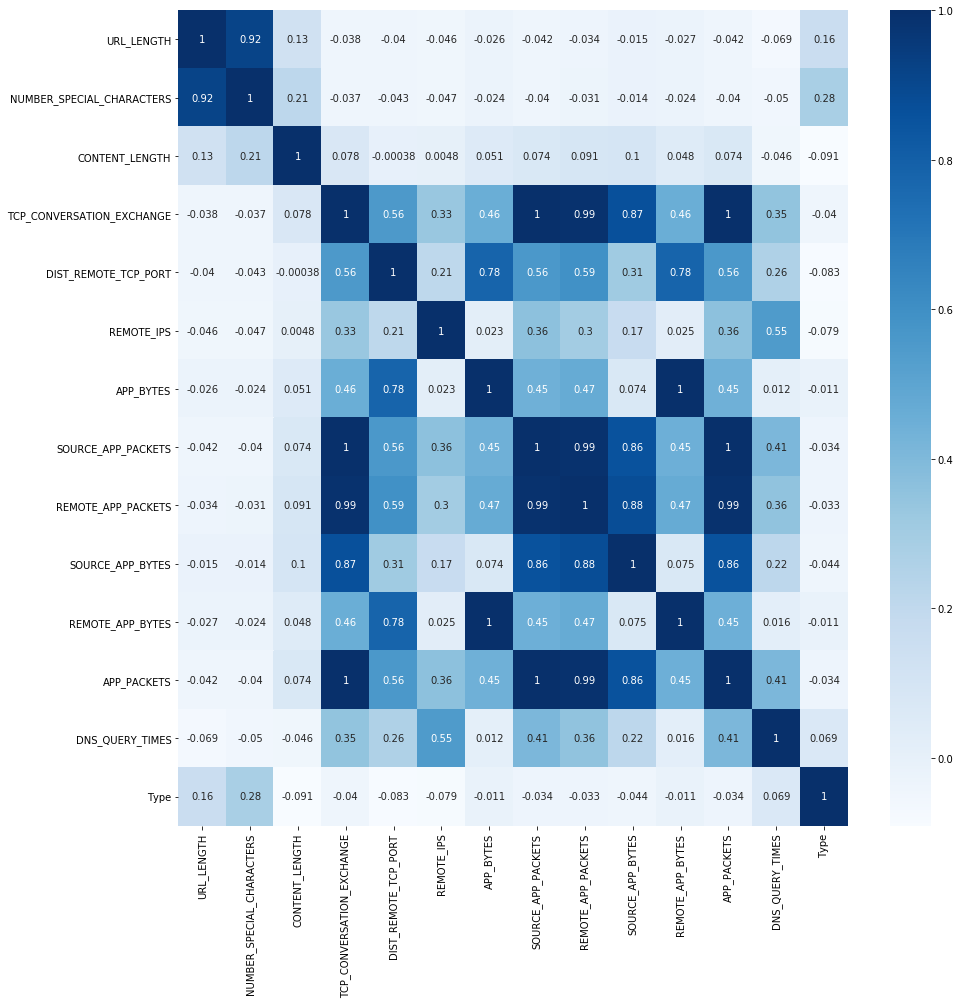

In [8]:
corr_matrix = websites.corr()
plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

### There are a lot of columns that has a very high correlation beween each other, some of them have a correlation as high as (0.92, 0.99 or even 1)

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [9]:
websites.drop(columns=['REMOTE_APP_PACKETS', 'TCP_CONVERSATION_EXCHANGE', 'REMOTE_APP_BYTES', 'APP_PACKETS', 'NUMBER_SPECIAL_CHARACTERS'], inplace = True)

### I looked at the heatmap from the step before and kept dropping column by column and seeing the effect of the heatmap and if there was high collinearity between some columns, and at the end I decided to drop only the five columns that had the highest  collinearity (Above 90%) and kept the rest fo the columns.

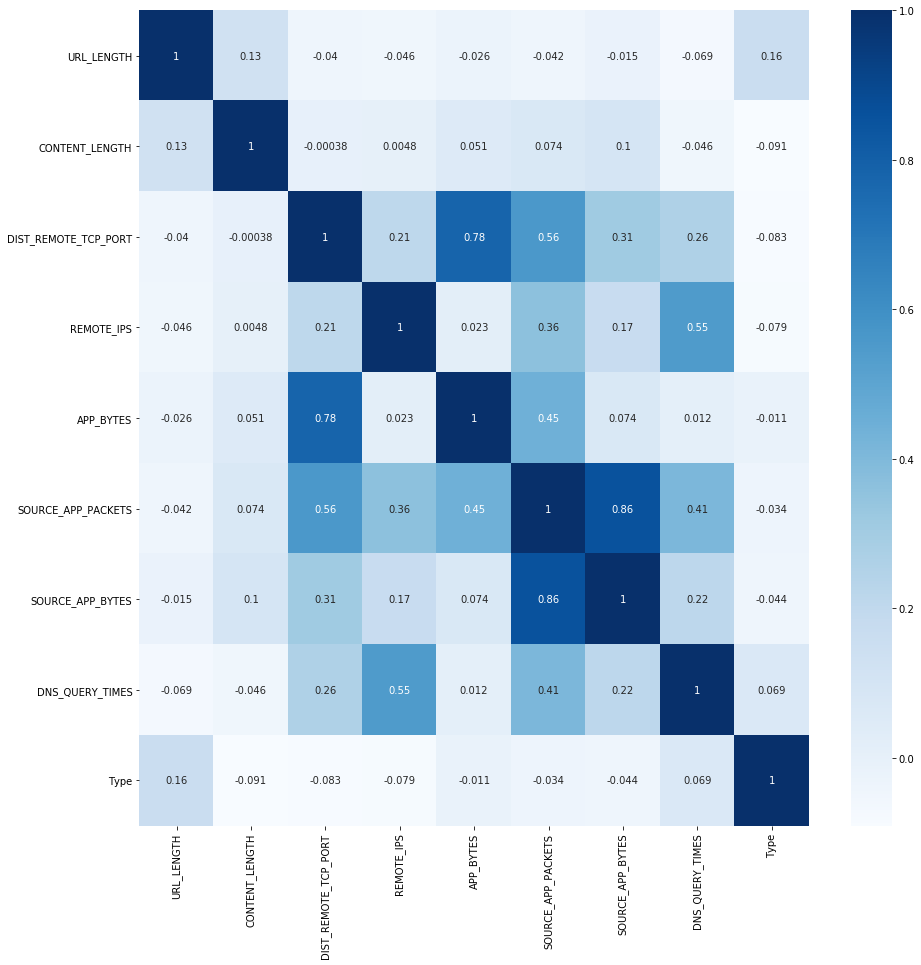

In [10]:
corr_matrix = websites.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [11]:
websites.isna().sum()

URL                       0
URL_LENGTH                0
CHARSET                   0
SERVER                    1
CONTENT_LENGTH          812
WHOIS_COUNTRY             0
WHOIS_STATEPRO            0
WHOIS_REGDATE             0
WHOIS_UPDATED_DATE        0
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
SOURCE_APP_PACKETS        0
SOURCE_APP_BYTES          0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [12]:
((websites['CONTENT_LENGTH'].isna().sum()) / (websites['CONTENT_LENGTH'].count())) * 100

83.79772961816305

In [13]:
websites.drop(columns=['CONTENT_LENGTH'], inplace = True)

In [14]:
websites.dropna(inplace=True)

### Decided to drop the 'CONTENT_LENGTH' column after finding out that it has 83% of missing values. After dropping the column found out that there are still two Nan values, one in 'SERVER' column and the other in the 'DNS_QUERY_TIMES' column, I decided to drop these two as well.

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [15]:
websites.isna().sum()

URL                     0
URL_LENGTH              0
CHARSET                 0
SERVER                  0
WHOIS_COUNTRY           0
WHOIS_STATEPRO          0
WHOIS_REGDATE           0
WHOIS_UPDATED_DATE      0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
SOURCE_APP_PACKETS      0
SOURCE_APP_BYTES        0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [16]:
# To see the unique values in the "WHOIS_COUNTRY" column
websites["WHOIS_COUNTRY"].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [17]:
# To replace the wrong inputs with the right ones
websites.replace({"WHOIS_COUNTRY": {'us':'US', 'se':'SE', 'United Kingdom':'UK', 'GB':'UK', "[u'GB'; u'UK']":'UK', 'Cyprus': 'CY'}}, inplace = True)

In [18]:
# To make sure the the values are corrected
websites["WHOIS_COUNTRY"].unique()

array(['None', 'US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'ru', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [19]:
# To see how many rows contain the value 'None' in them
websites.loc[websites["WHOIS_COUNTRY"] == 'None']

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,700,9,1153,2.0,1
1,B0_2314,16,UTF-8,Apache/2.4.10,None,None,None,None,7,4,1230,17,1265,0.0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,None,None,None,None,0,0,0,0,0,0.0,0
8,M2_17,20,utf-8,nginx/1.10.1,None,None,8/11/2014 7:41,None,0,0,0,2,213,2.0,1
9,M3_75,20,utf-8,nginx/1.10.1,None,None,8/11/2014 7:41,None,0,0,0,2,62,2.0,1
13,B0_482,20,ISO-8859-1,nginx,None,None,14/11/2002 0:00,19/04/2015 0:00,19,4,3946,35,16408,10.0,0
14,B0_869,20,ISO-8859-1,Apache/2.2.15 (Red Hat),None,None,None,None,0,0,0,0,0,0.0,0
17,B0_2303,21,us-ascii,Microsoft-HTTPAPI/2.0,None,None,9/08/1999 0:00,10/02/2015 0:00,7,3,618,7,562,0.0,0
18,B0_584,21,utf-8,nginx,None,None,None,None,1,5,1099,15,15476,2.0,0
22,B0_2176,22,iso-8859-1,Apache/2.2.22,None,None,12/08/2008 22:10,13/07/2016 17:36,3,2,420,4,372,0.0,0


In [20]:
# Decidded to drop the rows that has 'None', since we don't have any idea about what is the country and what to correct it to.
websites = websites[~websites["WHOIS_COUNTRY"].isin(['None'])]

In [21]:
# To make sure that the rows that have 'None' are dropped 
websites.loc[websites["WHOIS_COUNTRY"] == 'None']

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [22]:
#Here I am appending the value counts into a dictionary to use it later in a replace function
dic = dict(websites["WHOIS_COUNTRY"].value_counts())
websites["WHOIS_COUNTRY"].value_counts()

US    1105
CA      83
ES      63
UK      35
AU      35
PA      21
JP      11
IN      10
CN      10
FR       9
CZ       9
NL       6
CH       6
KR       5
PH       4
BS       4
AT       4
SE       4
ru       4
TR       3
BE       3
SC       3
DE       3
KY       3
HK       3
SI       2
NO       2
UY       2
UA       2
IL       2
CY       2
KG       2
RU       2
BR       2
AE       1
LV       1
UG       1
TH       1
PK       1
BY       1
IE       1
IT       1
LU       1
Name: WHOIS_COUNTRY, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [23]:
#Here I am modifying the dictionary created before to use it to replace the countries after top10 to 'OTHER'
top_10 = ["US", "CA", "ES", "UK", "AU", "PA", "JP", "CN", "IN", "FR"]
for i in top_10:
    del dic[i]
for key, value in dic.items():
    dic[key] = 'OTHER'

In [24]:
#To replace the countries that are not top 10 with 'OTHER'
websites.replace({"WHOIS_COUNTRY": dic}, inplace = True)

In [25]:
# See the "WHOIS_COUNTRY" count again, to make sure that the values changed
websites["WHOIS_COUNTRY"].value_counts()

US       1105
OTHER      91
CA         83
ES         63
AU         35
UK         35
PA         21
JP         11
IN         10
CN         10
FR          9
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [26]:
websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace = True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [27]:
websites.dtypes

URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
SOURCE_APP_PACKETS        int64
SOURCE_APP_BYTES          int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [28]:
websites.drop(columns=['URL'], inplace = True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [29]:
websites["CHARSET"].value_counts()

UTF-8           563
ISO-8859-1      364
utf-8           322
us-ascii        121
iso-8859-1       94
None              7
windows-1252      1
windows-1251      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [30]:
websites["SERVER"].value_counts()

Apache                                                                                                                323
None                                                                                                                  154
nginx                                                                                                                 147
Microsoft-HTTPAPI/2.0                                                                                                  86
cloudflare-nginx                                                                                                       81
GSE                                                                                                                    49
Server                                                                                                                 48
Microsoft-IIS/7.5                                                                                                      43
YouTubeFrontEnd         

![Think Hard](../images/think-hard.jpg)

### The column has too many unique values, but most of them contain one of the following (nginx, Apache, Microsoft)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [31]:
# Creating a list with the top 3 servers and replacing any row that contain any of the servers names into the name of the server

top_3_servers = ['Microsoft', 'Apache', 'nginx']

for i in top_3_servers:
    websites["SERVER"].loc[websites["SERVER"].str.contains(f'{i}')] = f'{i}'

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
#Here I am appending the new value counts into a dictionary to use it later in a replace function

dic2 = dict(websites["SERVER"].value_counts())
websites["SERVER"].value_counts()

Apache                                                             520
nginx                                                              329
Microsoft                                                          158
None                                                               154
GSE                                                                 49
Server                                                              48
YouTubeFrontEnd                                                     41
ATS                                                                 30
Varnish                                                              7
LiteSpeed                                                            5
Jetty(9.0.z-SNAPSHOT)                                                4
mw2165.codfw.wmnet                                                   4
ebay server                                                          4
mw2239.codfw.wmnet                                                   4
openre

In [33]:
# Here I am cleaning the dictionary before I apply the replace function on the whole 'SERVER' column
for i in top_3_servers:
    del dic2[i]
for key, value in dic2.items():
    dic2[key] = 'Other'

In [34]:
websites.replace({"SERVER": dic2}, inplace = True)

In [35]:
websites["SERVER"].value_counts()

Apache       520
Other        466
nginx        329
Microsoft    158
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [36]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 3 to 1780
Data columns (total 11 columns):
URL_LENGTH              1473 non-null int64
CHARSET                 1473 non-null object
SERVER                  1473 non-null object
WHOIS_COUNTRY           1473 non-null object
DIST_REMOTE_TCP_PORT    1473 non-null int64
REMOTE_IPS              1473 non-null int64
APP_BYTES               1473 non-null int64
SOURCE_APP_PACKETS      1473 non-null int64
SOURCE_APP_BYTES        1473 non-null int64
DNS_QUERY_TIMES         1473 non-null float64
Type                    1473 non-null int64
dtypes: float64(1), int64(7), object(3)
memory usage: 138.1+ KB


In [37]:
charset = pd.get_dummies(websites.CHARSET, drop_first=True)
server = pd.get_dummies(websites.SERVER, drop_first=True)
country = pd.get_dummies(websites.WHOIS_COUNTRY, drop_first=True)
websites_dummy = pd.concat([websites, charset, server, country], axis=1)

In [38]:
websites_dummy.drop(columns=["CHARSET", "SERVER", "WHOIS_COUNTRY"], inplace = True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [39]:
websites_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 3 to 1780
Data columns (total 28 columns):
URL_LENGTH              1473 non-null int64
DIST_REMOTE_TCP_PORT    1473 non-null int64
REMOTE_IPS              1473 non-null int64
APP_BYTES               1473 non-null int64
SOURCE_APP_PACKETS      1473 non-null int64
SOURCE_APP_BYTES        1473 non-null int64
DNS_QUERY_TIMES         1473 non-null float64
Type                    1473 non-null int64
None                    1473 non-null uint8
UTF-8                   1473 non-null uint8
iso-8859-1              1473 non-null uint8
us-ascii                1473 non-null uint8
utf-8                   1473 non-null uint8
windows-1251            1473 non-null uint8
windows-1252            1473 non-null uint8
Microsoft               1473 non-null uint8
Other                   1473 non-null uint8
nginx                   1473 non-null uint8
CA                      1473 non-null uint8
CN                      1473 non-null uint8
ES         

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [40]:
y = pd.DataFrame(websites_dummy['Type'])
X = websites_dummy.drop(columns=['Type']).copy()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [42]:
# All models are imported in the first cell of the notebook.

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [43]:
ks_model = LogisticRegression().fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [44]:
y_pred = ks_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[262   0]
 [ 31   2]]
0.8949152542372881


What are your thoughts on the performance of the model? Write your conclusions below.

### The performance of the model is pretty good as it gives an accuracy of almost 90%

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [45]:
neigh1 = KNeighborsClassifier(n_neighbors=3)
neigh1.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [46]:
y_pred_2 = neigh1.predict(X_test)

print(confusion_matrix(y_test, y_pred_2))
print(accuracy_score(y_test, y_pred_2))

[[251  11]
 [ 10  23]]
0.9288135593220339


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [47]:
neigh2 = KNeighborsClassifier(n_neighbors=5)
neigh2.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
y_pred_3 = neigh2.predict(X_test)

print(confusion_matrix(y_test, y_pred_3))
print(accuracy_score(y_test, y_pred_3))

[[254   8]
 [ 11  22]]
0.9355932203389831


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [49]:
neigh3 = KNeighborsClassifier(n_neighbors=10)
neigh3.fit(X_train, y_train)

y_pred_4 = neigh3.predict(X_test)

print(confusion_matrix(y_test, y_pred_4))
print(accuracy_score(y_test, y_pred_4))

[[262   0]
 [ 15  18]]
0.9491525423728814


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [50]:
neigh4 = KNeighborsClassifier(n_neighbors=20)
neigh4.fit(X_train, y_train)

y_pred_5 = neigh4.predict(X_test)

print(confusion_matrix(y_test, y_pred_5))
print(accuracy_score(y_test, y_pred_5))

[[262   0]
 [ 18  15]]
0.9389830508474576


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


### When I increased k from 3 to 5, the accuracy level increased from 92.8% to 93.55%, this is why I wanted to try increasing k to 10 and check if the accuracy will increase more or not, and it did increase to 94.9%, but then I tried to increase k to 20 and then the accuracy became lesser than when I used 10 and 5. As a conclusion, it is good to increase the number of neighbors, but at some point it starts affecting the accuracy negativly rather than positively.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [51]:
# Your code here